In [103]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Data

In [104]:
url = 'D:/Google Drive/Colab Notebooks/SCS_3253_047_Machine_Learning/Term_Project/datasets/ISCX-URL2016_All.csv'
df = pd.read_csv(url)
df_backup = df.copy()

### Explore the data

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [106]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,...,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,...,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,...,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,6.000000,4.000000,6.000000,3.000000,2.000000,7.000000,5.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.691929,0.795234,0.731621,0.719904,0.000000,-1.000000
50%,0.000000,3.000000,8.000000,5.000000,9.000000,4.100000,3.000000,13.000000,8.000000,0.000000,...,1.000000,1.000000,0.000000,-1.000000,0.723003,0.835752,0.790535,0.785150,0.729292,-1.000000
75%,19.000000,3.000000,11.000000,6.500000,12.000000,5.000000,3.000000,19.000000,12.000000,1.000000,...,3.000000,6.000000,4.000000,3.000000,0.754305,0.884735,0.851410,0.884662,0.910005,0.758695
max,1385.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,193.000000,142.000000,207.000000,...,24.000000,40.000000,39.000000,40.000000,0.895403,1.000000,0.962479,1.000000,1.000000,1.000000


In [107]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [108]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [109]:
df.columns[df.isnull().any()].tolist()

['avgpathtokenlen',
 'NumberRate_DirectoryName',
 'NumberRate_FileName',
 'NumberRate_Extension',
 'NumberRate_AfterPath',
 'Entropy_DirectoryName',
 'Entropy_Filename',
 'Entropy_Extension',
 'Entropy_Afterpath']

In [110]:
df.isnull().values.any()

True

<AxesSubplot:>

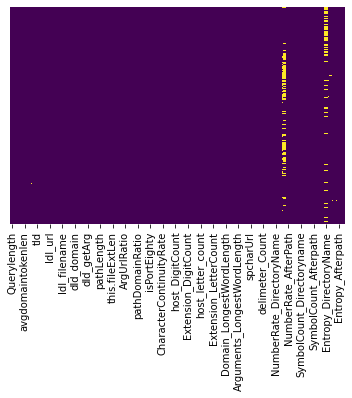

In [111]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Scrub the data
replace null with mean value

In [112]:
df['avgpathtokenlen'] = df['avgpathtokenlen'].fillna(df['avgpathtokenlen'].mean())
df['NumberRate_DirectoryName'] = df['NumberRate_DirectoryName'].fillna(df['NumberRate_DirectoryName'].mean())
df['NumberRate_FileName'] = df['NumberRate_FileName'].fillna(df['NumberRate_FileName'].mean())
df['NumberRate_Extension'] = df['NumberRate_Extension'].fillna(df['NumberRate_Extension'].mean())
df['NumberRate_AfterPath'] = df['NumberRate_AfterPath'].fillna(df['NumberRate_AfterPath'].mean())
df['Entropy_DirectoryName'] = df['Entropy_DirectoryName'].fillna(df['Entropy_DirectoryName'].mean())
df['Entropy_Filename'] = df['Entropy_Filename'].fillna(df['Entropy_Filename'].mean())
df['Entropy_Extension'] = df['Entropy_Extension'].fillna(df['Entropy_Extension'].mean())
df['Entropy_Afterpath'] = df['Entropy_Afterpath'].fillna(df['Entropy_Afterpath'].mean())

In [113]:
df.isnull().values.any()

False

<AxesSubplot:>

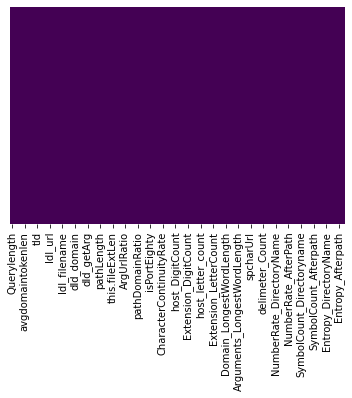

In [114]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Encoding the categorical variable

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['URL_Type_obf_Type'] = le.fit_transform(df['URL_Type_obf_Type']) #

#### Removing the unwanted columns

In [116]:
corr = df.corr()

In [117]:
print(df.shape)

(36707, 80)


In [118]:
# Selecting features based on correlation
# compare the correlation between features and remove one of more features that have a correlation higher than 0.9
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [119]:
print(df.shape)

(36707, 53)


In [120]:
#plt.figure(figsize=(28,25))
#sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
#plt.title('Correlation Heatmap')
#plt.show()

In [121]:
X = df.drop("URL_Type_obf_Type", axis=1)
y = df['URL_Type_obf_Type']

In [122]:
np.isnan(X).any()

Querylength                        False
domain_token_count                 False
path_token_count                   False
avgdomaintokenlen                  False
longdomaintokenlen                 False
avgpathtokenlen                    False
charcompvowels                     False
ldl_domain                         False
ldl_filename                       False
dld_url                            False
dld_domain                         False
dld_filename                       False
dld_getArg                         False
domainlength                       False
fileNameLen                        False
this.fileExtLen                    False
pathurlRatio                       False
ArgUrlRatio                        False
domainUrlRatio                     False
argPathRatio                       False
executable                         False
isPortEighty                       False
NumberofDotsinURL                  False
ISIpAddressInDomainName            False
CharacterContinu

In [123]:
np.isinf(X).any()

Querylength                        False
domain_token_count                 False
path_token_count                   False
avgdomaintokenlen                  False
longdomaintokenlen                 False
avgpathtokenlen                    False
charcompvowels                     False
ldl_domain                         False
ldl_filename                       False
dld_url                            False
dld_domain                         False
dld_filename                       False
dld_getArg                         False
domainlength                       False
fileNameLen                        False
this.fileExtLen                    False
pathurlRatio                       False
ArgUrlRatio                        False
domainUrlRatio                     False
argPathRatio                        True
executable                         False
isPortEighty                       False
NumberofDotsinURL                  False
ISIpAddressInDomainName            False
CharacterContinu

In [124]:
X = X.drop("argPathRatio", axis=1) # simply drop this for now

In [125]:
np.isinf(X).any()

Querylength                        False
domain_token_count                 False
path_token_count                   False
avgdomaintokenlen                  False
longdomaintokenlen                 False
avgpathtokenlen                    False
charcompvowels                     False
ldl_domain                         False
ldl_filename                       False
dld_url                            False
dld_domain                         False
dld_filename                       False
dld_getArg                         False
domainlength                       False
fileNameLen                        False
this.fileExtLen                    False
pathurlRatio                       False
ArgUrlRatio                        False
domainUrlRatio                     False
executable                         False
isPortEighty                       False
NumberofDotsinURL                  False
ISIpAddressInDomainName            False
CharacterContinuityRate            False
URL_DigitCount  

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [128]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

D:\x-20a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
y_pred = lr.predict(X_train)
accuracy_score(y_train, y_pred)

0.7542312276519666

In [130]:
''' 
%%time
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['lbfgs', 'liblinear', 'sag', 'saga'] # I exclude newton-cg
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0, verbose=2)
grid_result = grid_search.fit(X_train, y_train)
'''

" \n%%time\nfrom sklearn.model_selection import GridSearchCV\n\n# define models and parameters\nmodel = LogisticRegression()\nsolvers = ['lbfgs', 'liblinear', 'sag', 'saga'] # I exclude newton-cg\npenalty = ['none', 'l1', 'l2', 'elasticnet']\nc_values = [100, 10, 1.0, 0.1, 0.01]\n# define grid search\ngrid = dict(solver=solvers,penalty=penalty,C=c_values)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0, verbose=2)\ngrid_result = grid_search.fit(X_train, y_train)\n"

In [131]:
#print(grid_search.best_params_)
#print(grid_search.best_score_)

In [132]:
%%time
from sklearn.mixture import GaussianMixture

random_state=42

gm = GaussianMixture(covariance_type = 'full', random_state=random_state)

gm.fit(X_train)
print(gm)

y_pred_gm = gm.predict(X_train)

X_train_gm, y_train_gm = X_train[(y_pred_gm != -1)], y_train[(y_pred_gm != -1)]

GaussianMixture(random_state=42)
Wall time: 377 ms


In [133]:
log_gm_clf = LogisticRegression(random_state=random_state, max_iter=1000)

log_gm_clf.fit(X_train_gm, y_train_gm)

y_pred_log_gm = log_gm_clf.predict(X_train_gm)

accuracy_score(y_train_gm, y_pred_log_gm)

D:\x-20a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8142686872126681

In [134]:
# the accurracy improves after implementing the GaussianMixture

### IsolationForest

In [50]:
%%time
from sklearn.ensemble import IsolationForest

#iforest = IsolationForest(contamination='auto', random_state=42)
iforest = IsolationForest(contamination=0.01, random_state=42).fit(X_train)

y_pred_iforest = iforest.predict(X_train)

X_train_iforest, y_train_iforest = X_train[(y_pred_iforest != -1)], y_train[(y_pred_iforest != -1)]

lr_iforest = LogisticRegression()
lr_iforest.fit(X_train_iforest, y_train_iforest)

Wall time: 6.04 s


D:\x-20a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred_iforest = lr_iforest.predict(X_train_iforest)

accuracy_score(y_train_iforest, y_pred_iforest)

0.7591070138626123

In [52]:
print(X_train.shape)
print(X_train_iforest.shape)

(29365, 51)
(29071, 51)


In [53]:
print(y_train.shape)
print(y_train_iforest.shape)

(29365,)
(29071,)


In [34]:
#%%time
#grid_result = grid_search.fit(X_train_iforest, y_train_iforest)

In [35]:
#print(grid_search.best_params_)
#print(grid_search.best_score_)

### OneClassSVM

In [60]:
%%time
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto').fit(X_train)

y_pred_one_class_svm = one_class_svm.predict(X_train)

X_train_one_class_svm, y_train_one_class_svm = X_train[(y_pred_one_class_svm != -1)], y_train[(y_pred_one_class_svm != -1)]

lr_one_class_svm = LogisticRegression()
lr_one_class_svm.fit(X_train_one_class_svm, y_train_one_class_svm)

Wall time: 1min 53s


D:\x-20a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred_one_class_svm = lr_one_class_svm.predict(X_train_one_class_svm)

accuracy_score(y_train_one_class_svm, y_pred_one_class_svm)

0.757085695231744

In [62]:
print(X_train.shape)
print(X_train_one_class_svm.shape)

(29365, 51)
(23992, 51)


In [63]:
print(y_train.shape)
print(y_train_one_class_svm.shape)

(29365,)
(23992,)


In [ ]:
### Gau